[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Soccer Pitch Keypoint Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi)

This notebook is based on the [How to Train a YOLOv8 Keypint Detection Model](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-keypoint.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [15]:
!nvidia-smi

Thu Oct 17 14:26:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   47C    P8             N/A /  115W |    1220MiB /   8188MiB |     29%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\isss1\GitHub\soccer-computer-vision-analysis


## Install dependencies

In [1]:
!pip install ultralytics roboflow

## Imports

In [2]:
from roboflow import Roboflow
from IPython.display import Image

## Pull dataset

In [7]:
import os

!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = os.environ['ROBOFLOW_API_KEY']
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("soccercomputervision-twrd5").project("soccer-field-detection-sbywb")
version = project.version(2)
dataset = version.download("yolov8")

The syntax of the command is incorrect.
This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.


[WinError 2] The system cannot find the file specified: 'c:\\Users\\isss1\\GitHub\\soccer-computer-vision-analysis/datasets'
c:\Users\isss1\GitHub\soccer-computer-vision-analysis
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.15, to fix: `pip install ultralytics==8.0.196`


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [20]:
import re

def update_yaml_paths(file_path):
    # Read the file content
    with open(file_path, 'r') as f:
        content = f.read()

    # Update the 'train' path
    content = re.sub(r'^(train:\s*).*$', r'\1../train/images', content, flags=re.MULTILINE)

    # Update the 'val' path
    content = re.sub(r'^(val:\s*).*$', r'\1../valid/images', content, flags=re.MULTILINE)

    # Write the updated content back to the file
    with open(file_path, 'w') as f:
        f.write(content)

# Usage example
dataset_location = "soccer-field-detection-2"  # Replace with the actual path
update_yaml_paths(f"{dataset_location}/data.yaml")


## Custom training

In [21]:
%cd {HOME}

print("Trainng model, this should take a while...")
!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=100 imgsz=640 mosaic=0.0 plots=True
print("Training finished...")

c:\Users\isss1\GitHub\soccer-computer-vision-analysis
Trainng model, this should take a while...
^C
Training finished...


In [7]:
import torch
if torch.cuda.is_available():
    print("CUDA is available. Training on GPU!")
else:
    print("CUDA is not available. Training on CPU.")


CUDA is available. Training on GPU!


In [11]:
import os

home = os.getcwd()  # Get the HOME environment variable
directory = os.path.join(home, "runs/pose/train2")  # Construct the path

# List all files and directories in the specified directory
files = os.listdir(directory)

for file in files:
    print(file)


args.yaml
BoxF1_curve.png
BoxPR_curve.png
BoxP_curve.png
BoxR_curve.png
confusion_matrix.png
confusion_matrix_normalized.png
labels.jpg
labels_correlogram.jpg
model_artifacts.json
PoseF1_curve.png
PosePR_curve.png
PoseP_curve.png
PoseR_curve.png
results.csv
results.png
roboflow_deploy.zip
state_dict.pt
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
train_batch450.jpg
train_batch451.jpg
train_batch452.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


c:\Users\isss1\GitHub\soccer-computer-vision-analysis


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


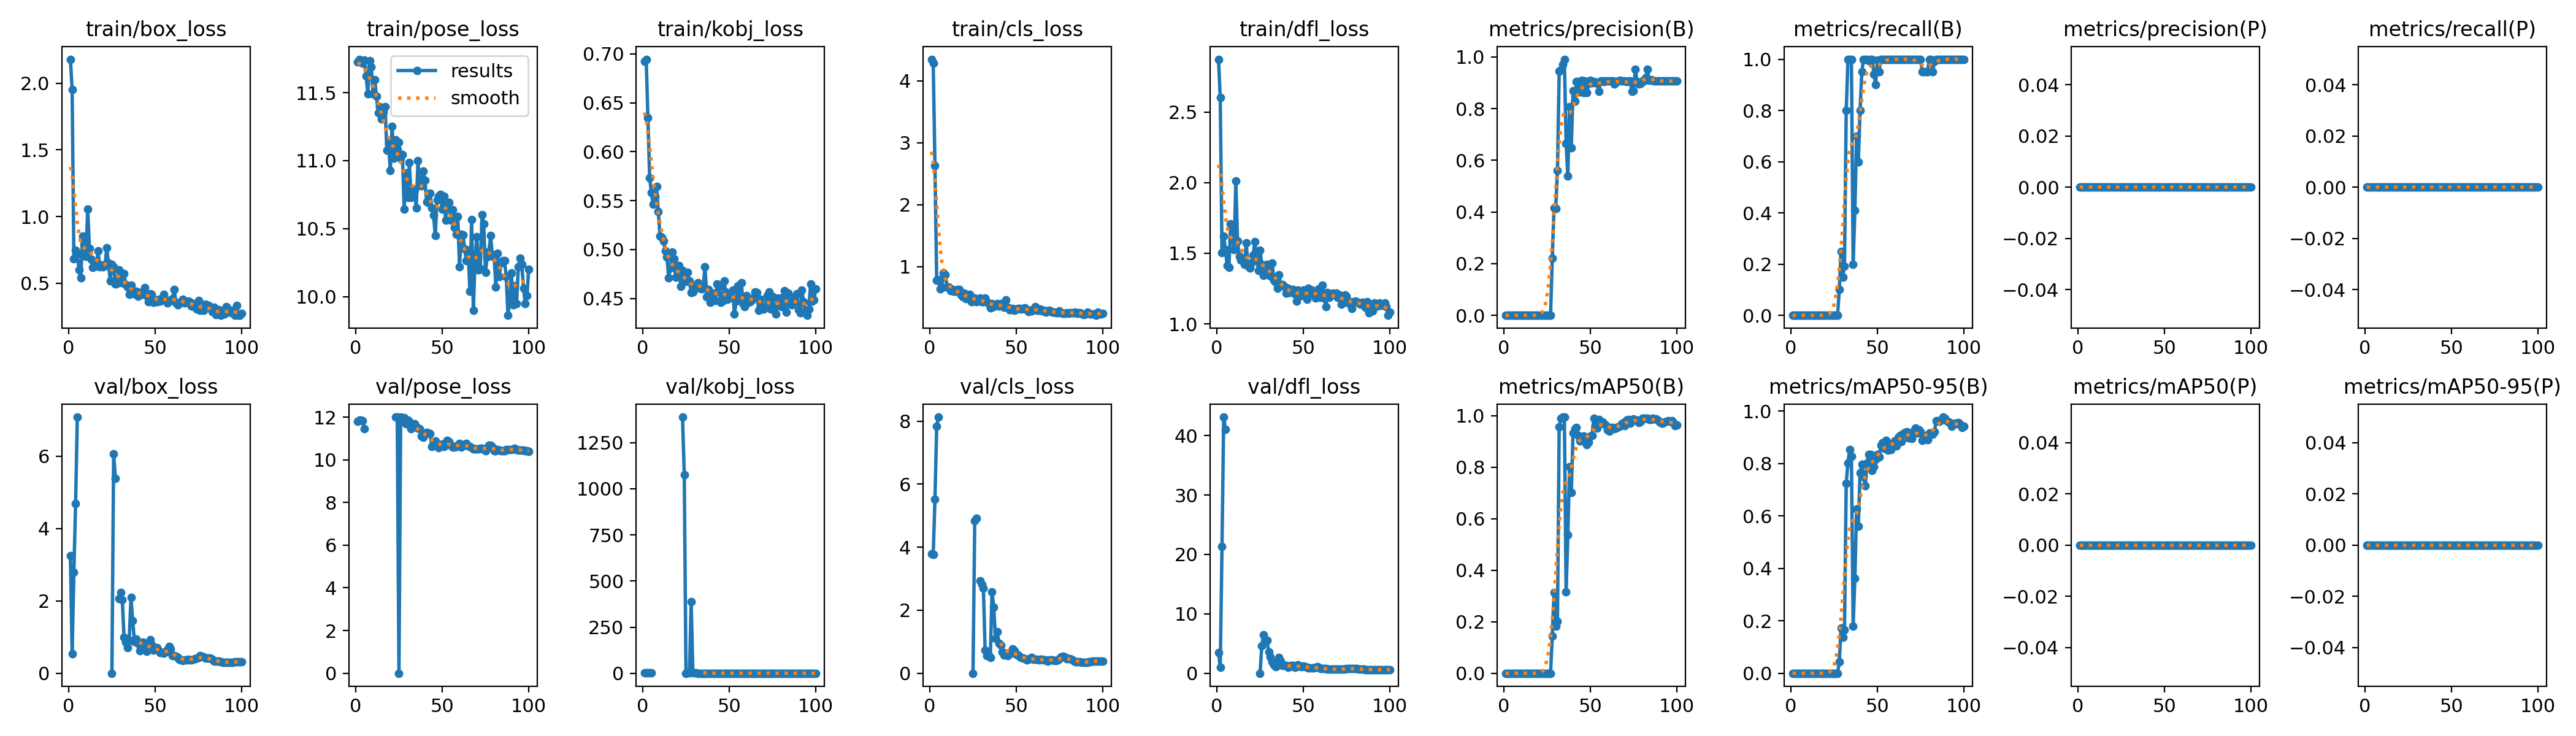

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train2/results.png', width=600)

c:\Users\isss1\GitHub\soccer-computer-vision-analysis


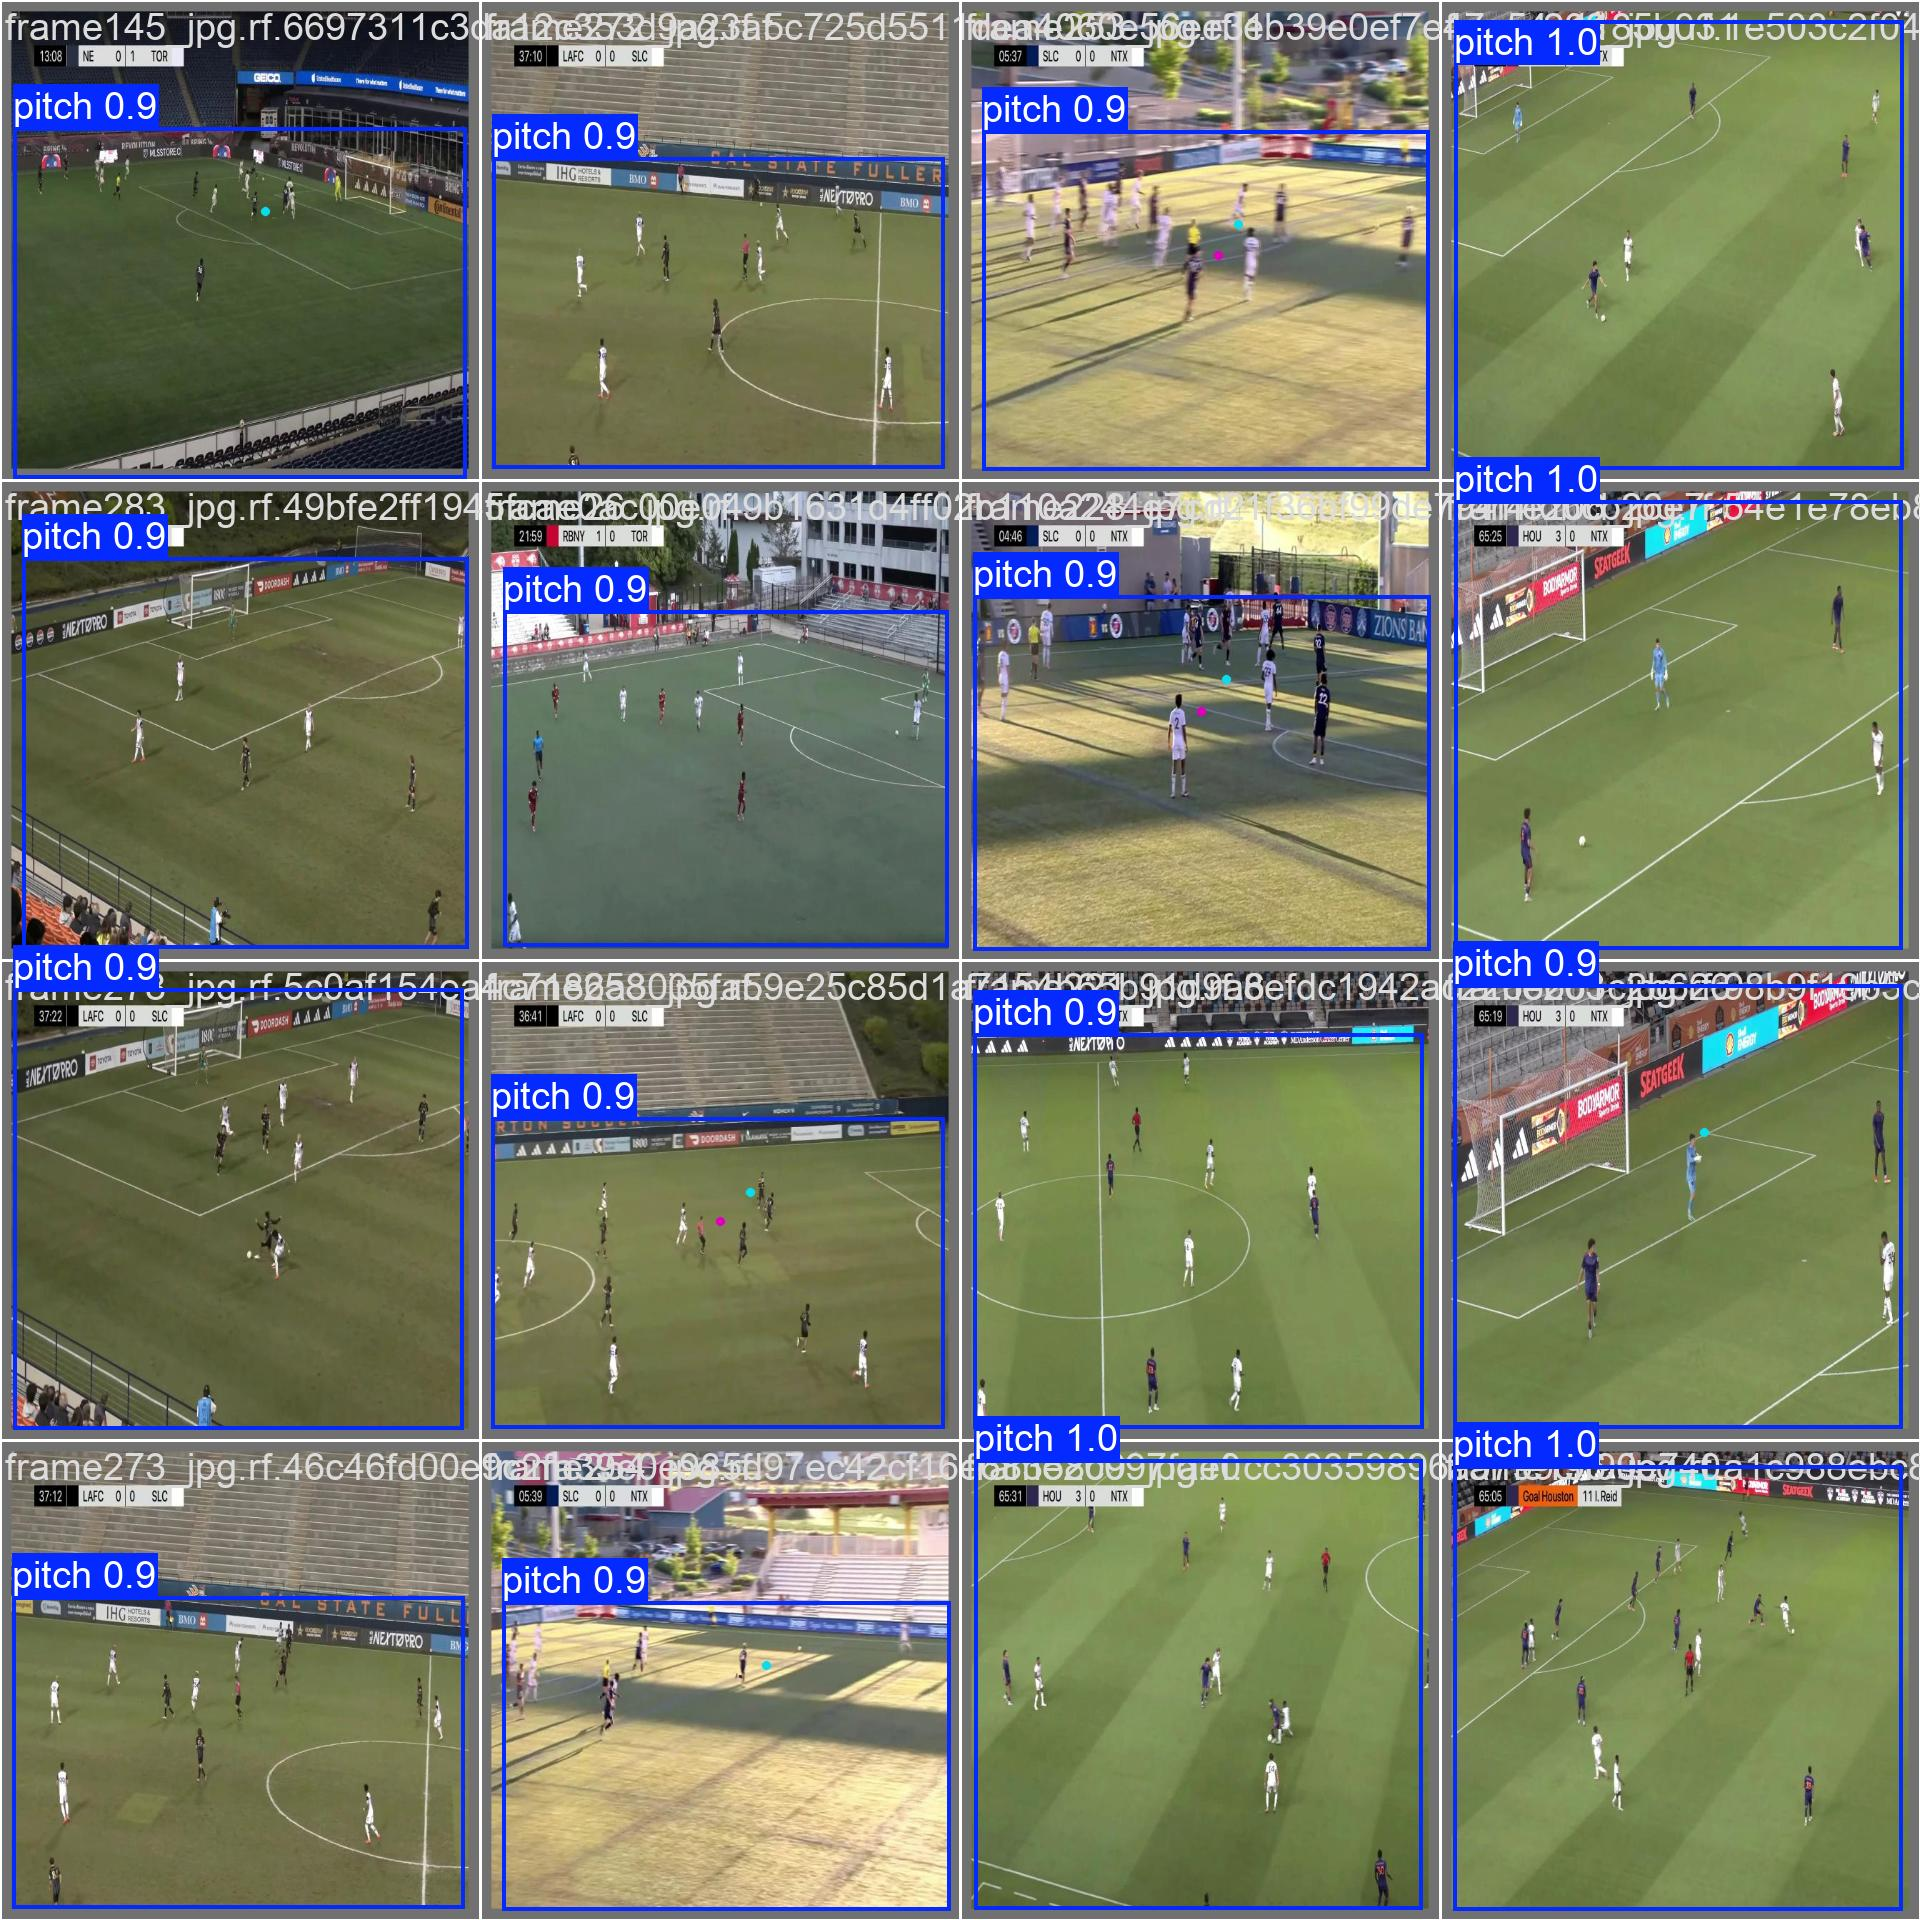

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train2/val_batch0_pred.jpg', width=600)

## Validate custom model

In [17]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train2/weights/best.pt data={dataset.location}/data.yaml

c:\Users\isss1\GitHub\soccer-computer-vision-analysis
Ultralytics 8.3.7 🚀 Python-3.11.9 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
YOLOv8x-pose summary (fused): 305 layers, 63,256,275 parameters, 0 gradients, 234.0 GFLOPs
                   all         22         20      0.907          1      0.988      0.977          0          0          0          0
Speed: 4.0ms preprocess, 40.3ms inference, 0.0ms loss, 15.3ms postprocess per image
Results saved to runs\pose\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\isss1\GitHub\soccer-computer-vision-analysis\soccer-field-detection-2\valid\labels.cache... 22 images, 2 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
val: Scanning C:\Users\isss1\GitHub\soccer-computer-vision-analysis\soccer-field-detection-2\valid\labels.cache... 22 images, 2 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:03<00:03,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP

## Deploy model on Roboflow

In [8]:
project.version(dataset.version).deploy(model_type="yolov8-pose", model_path=f"{HOME}/runs/pose/train2/")

Dependency ultralytics==8.0.196 is required but found version=8.3.15, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/soccercomputervision-twrd5/soccer-field-detection-sbywb/2
Share your model with the world at: https://universe.roboflow.com/soccercomputervision-twrd5/soccer-field-detection-sbywb/model/2


In [14]:
# latest_version = project.versions  # Fetch the most recent version

print(project.version(2))

# print(f"Project Name: {project.name}")
# print(f"Latest Version: {latest_version.version}")
# print(f"Version Status: {latest_version.status}")  # e.g., 'Active', 'Training Complete'
# print(f"Model Download URL: {latest_version.model_url}")



{
  "name": "soccer-field-detection",
  "type": "keypoint-detection",
  "version": "2",
  "augmentation": {},
  "created": 1729104347.301,
  "preprocessing": {
    "auto-orient": true,
    "resize": {
      "format": "Stretch to",
      "width": 640,
      "height": 640
    }
  },
  "splits": {
    "valid": 22,
    "test": 10,
    "train": 73
  },
  "workspace": "soccercomputervision-twrd5"
}
